# Aula 08 - EDA Parte 2: Correlações e Análise Bivariada
**Curso:** Programação para Ciência de Dados  
**Aluno:** Gisele Fonseca  
**Data:** 30 de outubro

## Instruções
1. Complete todos os exercícios marcados com `# === SEU CÓDIGO AQUI ===`
2. Execute as células de teste para verificar suas respostas
3. **Tempo estimado total:** 30 minutos

## Critérios de Avaliação
- **Conteúdo (100%):** Testes automáticos

## Objetivo
Consolidar conhecimentos de correlações, análise bivariada e visualizações avançadas.

In [1]:
# === CONFIGURAÇÃO INICIAL ===

!pip install --upgrade pip --quiet
!pip cache purge
!pip install otter-grader --no-cache-dir -q
!pip install seaborn --no-cache-dir -q
!mkdir -p tests

print("Ambiente configurado!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.3 MB/s eta 0:00:00
Files removed: 6 (1.8 MB)
Ambiente configurado!


In [2]:
%%writefile tests/q1.py
OK_FORMAT = True

test = {
    "name": "q1",
    "points": 3,
    "suites": [
        {
            "cases": [
                {
                    "code": r"""
>>> # Teste 1: Retorna dicionário
>>> import pandas as pd
>>> import numpy as np
>>> df = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]})
>>> resultado = analisar_correlacoes_completo(df)
>>> isinstance(resultado, dict)
True
""",
                    "hidden": False,
                    "locked": False
                },
                {
                    "code": r"""
>>> # Teste 2: Chaves corretas
>>> import pandas as pd
>>> df = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6]})
>>> resultado = analisar_correlacoes_completo(df)
>>> 'matriz_correlacao' in resultado and 'pares_fortes' in resultado
True
""",
                    "hidden": False,
                    "locked": False
                }
            ],
            "scored": True,
            "setup": "",
            "teardown": "",
            "type": "doctest"
        }
    ]
}

Writing tests/q1.py


In [3]:
%%writefile tests/q2.py
OK_FORMAT = True

test = {
    "name": "q2",
    "points": 3,
    "suites": [
        {
            "cases": [
                {
                    "code": r"""
>>> # Teste 1: Retorna figura
>>> import pandas as pd
>>> import matplotlib.pyplot as plt
>>> df = pd.DataFrame({'cat': ['A', 'B'], 'val': [10, 20]})
>>> fig, axes = analisar_categorica_vs_numerica(df, 'cat', 'val')
>>> isinstance(fig, plt.Figure)
True
""",
                    "hidden": False,
                    "locked": False
                }
            ],
            "scored": True,
            "setup": "",
            "teardown": "",
            "type": "doctest"
        }
    ]
}

Writing tests/q2.py


In [4]:
%%writefile tests/q3.py
OK_FORMAT = True

test = {
    "name": "q3",
    "points": 2,
    "suites": [
        {
            "cases": [
                {
                    "code": r"""
>>> # Teste 1: Cria dashboard
>>> import pandas as pd
>>> import matplotlib.pyplot as plt
>>> df = pd.DataFrame({'x': [1, 2, 3], 'y': [4, 5, 6], 'z': [7, 8, 9]})
>>> fig, axes = criar_dashboard_correlacoes(df)
>>> isinstance(fig, plt.Figure)
True
""",
                    "hidden": False,
                    "locked": False
                }
            ],
            "scored": True,
            "setup": "",
            "teardown": "",
            "type": "doctest"
        }
    ]
}

Writing tests/q3.py


In [5]:
%%writefile tests/q4.py
OK_FORMAT = True

test = {
    "name": "q4",
    "points": 2,
    "suites": [
        {
            "cases": [
                {
                    "code": r"""
>>> # Teste 1: Retorna dicionário
>>> import pandas as pd
>>> df = pd.DataFrame({'x': [1, 2, 3], 'y': [4, 5, 6]})
>>> resultado = relatorio_eda_completo(df)
>>> isinstance(resultado, dict)
True
""",
                    "hidden": False,
                    "locked": False
                }
            ],
            "scored": True,
            "setup": "",
            "teardown": "",
            "type": "doctest"
        }
    ]
}

Writing tests/q4.py


In [6]:
import otter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

grader = otter.Notebook()

# Configurar estilo
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100

print("✓ Otter Grader carregado")
print("✓ Bibliotecas importadas")
print(f"✓ Versão Pandas: {pd.__version__}")
print(f"✓ Versão Seaborn: {sns.__version__}")

✓ Otter Grader carregado
✓ Bibliotecas importadas
✓ Versão Pandas: 2.2.2
✓ Versão Seaborn: 0.13.2


# Exercício 1: Análise de Correlações Completa

## Descrição
Dado DataFrame, faça análise completa de correlações retornando:

1. **matriz_correlacao**: DataFrame com matriz de correlação
2. **pares_fortes**: lista de tuplas (var1, var2, corr) onde |corr| >= 0.7
3. **pares_moderados**: lista de tuplas onde 0.4 <= |corr| < 0.7
4. **pares_fracos**: lista de tuplas onde |corr| < 0.4
5. **mais_correlacionada**: tupla (var1, var2, corr) com maior |corr|
6. **menos_correlacionada**: tupla (var1, var2, corr) com menor |corr|

## Exemplo
```python
df = pd.DataFrame({
    'a': [1, 2, 3, 4, 5],
    'b': [2, 4, 6, 8, 10],  # Correlação perfeita com a
    'c': [5, 4, 3, 2, 1]    # Correlação negativa com a
})

resultado = analisar_correlacoes_completo(df)
# resultado['pares_fortes'] inclui (a, b, 1.0) e (a, c, -1.0)
```

## Dicas
- Use .corr() para matriz
- Processe triângulo superior para evitar duplicatas
- Use abs() para classificar forças
- Ordene por valor absoluto

**Tempo estimado:** 12 minutos

In [7]:
def analisar_correlacoes_completo(df):
    """
    Análise completa de correlações.

    Args:
        df (pd.DataFrame): DataFrame com variáveis numéricas

    Returns:
        dict: Dicionário com análise completa
    """
    # === SEU CÓDIGO AQUI ===

    matriz = df.corr(numeric_only=True)

    pares = []
    for i in range(len(matriz.columns)):
        for j in range(i + 1, len(matriz.columns)):
            corr = matriz.iloc[i, j]
            pares.append((matriz.columns[i], matriz.columns[j], corr))

    pares_fortes = [(a, b, c) for a, b, c in pares if abs(c) >= 0.7]
    pares_moderados = [(a, b, c) for a, b, c in pares if 0.4 <= abs(c) < 0.7]
    pares_fracos = [(a, b, c) for a, b, c in pares if abs(c) < 0.4]

    if pares:
        mais_corr = max(pares, key=lambda x: abs(x[2]))
        menos_corr = min(pares, key=lambda x: abs(x[2]))
    else:
        mais_corr = menos_corr = None

    return {
        "matriz_correlacao": matriz,
        "pares_fortes": pares_fortes,
        "pares_moderados": pares_moderados,
        "pares_fracos": pares_fracos,
        "mais_correlacionada": mais_corr,
        "menos_correlacionada": menos_corr
    }


    # === FIM DO SEU CÓDIGO ===

In [8]:
# Criar dataset com correlações variadas
np.random.seed(42)
n = 100

# Variável base
x = np.random.normal(100, 15, n)

df_correlacoes = pd.DataFrame({
    'x': x,
    'y_forte': x + np.random.normal(0, 2, n),           # Correlação forte positiva
    'z_negativa': -x + np.random.normal(0, 5, n),       # Correlação forte negativa
    'w_moderada': x * 0.5 + np.random.normal(50, 20, n), # Correlação moderada
    'v_fraca': np.random.normal(100, 20, n)             # Sem correlação
})

print("=== TESTE Q1 ===")
print("\n=== DADOS DE EXEMPLO ===")
print(df_correlacoes.head())

# Analisar correlações
analise = analisar_correlacoes_completo(df_correlacoes)

print("\n=== MATRIZ DE CORRELAÇÃO ===")
print(analise['matriz_correlacao'].round(3))

print(f"\n=== CORRELAÇÕES FORTES (|r| >= 0.7) ===")
if analise['pares_fortes']:
    for v1, v2, corr in analise['pares_fortes']:
        print(f"  {v1} ↔ {v2}: {corr:+.3f}")
else:
    print("  Nenhuma encontrada")

print(f"\n=== CORRELAÇÕES MODERADAS (0.4 <= |r| < 0.7) ===")
if analise['pares_moderados']:
    for v1, v2, corr in analise['pares_moderados']:
        print(f"  {v1} ↔ {v2}: {corr:+.3f}")
else:
    print("  Nenhuma encontrada")

print(f"\n=== CORRELAÇÕES FRACAS (|r| < 0.4) ===")
if analise['pares_fracos']:
    for v1, v2, corr in analise['pares_fracos']:
        print(f"  {v1} ↔ {v2}: {corr:+.3f}")
else:
    print("  Nenhuma encontrada")

print("\n=== EXTREMOS ===")
if analise['mais_correlacionada']:
    v1, v2, corr = analise['mais_correlacionada']
    print(f"Mais correlacionada: {v1} ↔ {v2} = {corr:+.3f}")

if analise['menos_correlacionada']:
    v1, v2, corr = analise['menos_correlacionada']
    print(f"Menos correlacionada: {v1} ↔ {v2} = {corr:+.3f}")

print("\n=== RESUMO ===")
print(f"Total de pares analisados: {len(analise['pares_fortes']) + len(analise['pares_moderados']) + len(analise['pares_fracos'])}")
print(f"  Fortes: {len(analise['pares_fortes'])}")
print(f"  Moderadas: {len(analise['pares_moderados'])}")
print(f"  Fracas: {len(analise['pares_fracos'])}")

grader.check("q1")

=== TESTE Q1 ===

=== DADOS DE EXEMPLO ===
            x     y_forte  z_negativa  w_moderada     v_fraca
0  107.450712  104.619971 -105.661775   87.145456   68.111447
1   97.926035   97.084745  -95.122113   87.759397   88.012500
2  109.715328  109.029899 -104.300072  119.803536  100.104874
3  122.845448  121.240893 -117.576438  123.630129  100.939612
4   96.487699   96.165128 -103.376046   97.825818   90.998691

=== MATRIZ DE CORRELAÇÃO ===
                x  y_forte  z_negativa  w_moderada  v_fraca
x           1.000    0.990      -0.921       0.213   -0.136
y_forte     0.990    1.000      -0.913       0.205   -0.111
z_negativa -0.921   -0.913       1.000      -0.184    0.094
w_moderada  0.213    0.205      -0.184       1.000    0.160
v_fraca    -0.136   -0.111       0.094       0.160    1.000

=== CORRELAÇÕES FORTES (|r| >= 0.7) ===
  x ↔ y_forte: +0.990
  x ↔ z_negativa: -0.921
  y_forte ↔ z_negativa: -0.913

=== CORRELAÇÕES MODERADAS (0.4 <= |r| < 0.7) ===
  Nenhuma encontrada

=== 

q1 results: All test cases passed!

# Exercício 2: Análise Categórica vs Numérica

## Descrição
Dado DataFrame, coluna categórica e coluna numérica,
crie visualização 1×3 mostrando:

1. **Left:** Boxplot por categoria
2. **Center:** Violin plot por categoria
3. **Right:** Bar chart com médias e erro padrão

Use Seaborn para os gráficos.

## Retorno Esperado
Tupla (fig, axes) com os 3 subplots.

## Dicas
```python
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Boxplot
sns.boxplot(data=df, x=col_cat, y=col_num, ax=axes[0])

# Violin plot
sns.violinplot(data=df, x=col_cat, y=col_num, ax=axes[1])

# Bar chart com erro padrão
sns.barplot(data=df, x=col_cat, y=col_num, errorbar='se', ax=axes[2])
```

**Tempo estimado:** 10 minutos

In [9]:
def analisar_categorica_vs_numerica(df, col_cat, col_num):
    """
    Análise visual de variável categórica vs numérica.

    Args:
        df (pd.DataFrame): DataFrame
        col_cat (str): Nome da coluna categórica
        col_num (str): Nome da coluna numérica

    Returns:
        tuple: (fig, axes)
    """
    # === SEU CÓDIGO AQUI ===

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    sns.boxplot(data=df, x=col_cat, y=col_num, ax=axes[0])
    axes[0].set_title("Boxplot")

    sns.violinplot(data=df, x=col_cat, y=col_num, ax=axes[1])
    axes[1].set_title("Violin Plot")

    sns.barplot(data=df, x=col_cat, y=col_num, errorbar='se', ax=axes[2])
    axes[2].set_title("Média e Erro Padrão")

    plt.tight_layout()
    return fig, axes


    # === FIM DO SEU CÓDIGO ===

=== TESTE Q2 ===

=== DADOS DE EXEMPLO ===
  regiao        vendas
0  Norte  53973.713224
1  Norte  48893.885591
2  Norte  55181.508305
3  Norte  62184.238851
4  Norte  48126.773002

=== ESTATÍSTICAS POR REGIÃO ===
         count          mean           std           min           25%  \
regiao                                                                   
Norte     50.0  48196.208758   7469.350255  34322.639009  43112.167130   
Sudeste   50.0  79528.549200  12184.963035  56974.745416  69408.681099   
Sul       50.0  65177.808705   8743.249875  38802.548959  60038.886579   

                  50%           75%            max  
regiao                                              
Norte    48126.838673  52690.204403   64818.225476  
Sudeste  80202.298007  86118.251382  109558.905350  
Sul      65460.802624  70870.740749   80646.436558  


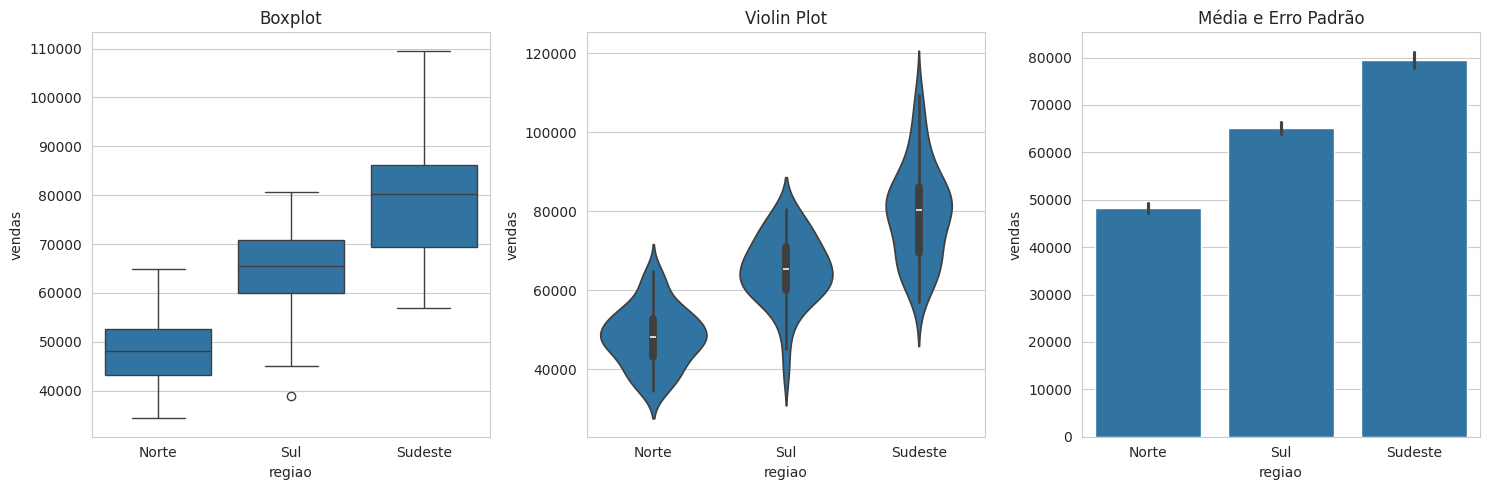


=== INTERPRETAÇÃO ===
📊 Boxplot: mostra quartis, mediana e outliers
🎻 Violin: mostra densidade da distribuição
📈 Barras: compara médias com incerteza (erro padrão)


q2 results: All test cases passed!

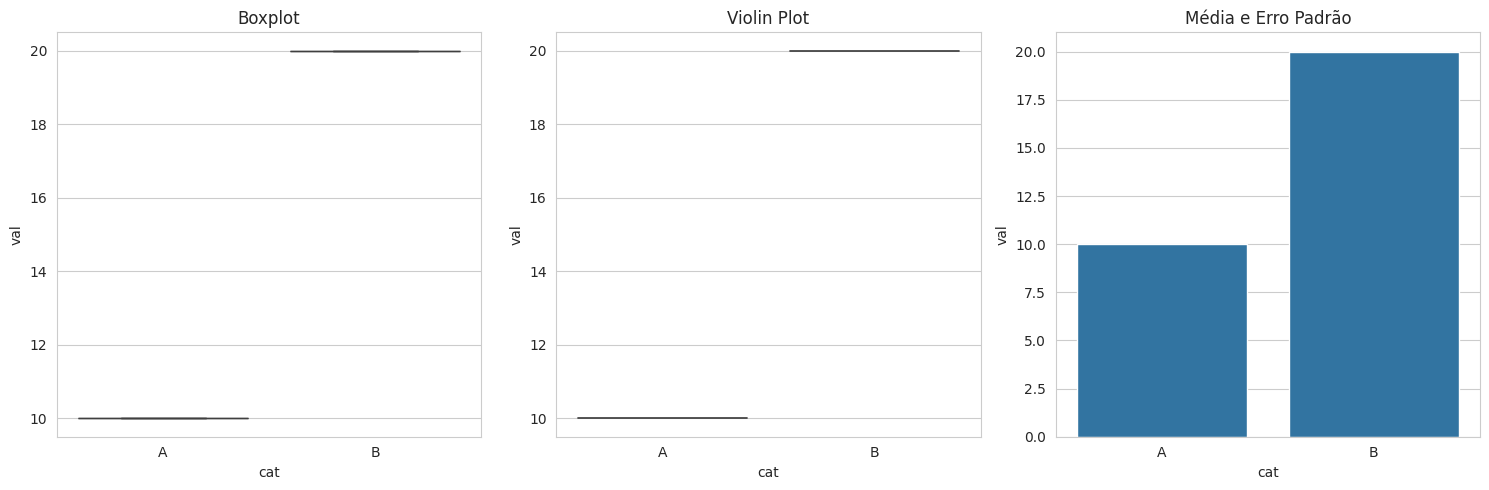

In [10]:
# Criar dados com categorias
np.random.seed(42)
n_per_cat = 50

df_cat_num = pd.DataFrame({
    'regiao': ['Norte']*n_per_cat + ['Sul']*n_per_cat + ['Sudeste']*n_per_cat,
    'vendas': np.concatenate([
        np.random.normal(50000, 8000, n_per_cat),
        np.random.normal(65000, 10000, n_per_cat),
        np.random.normal(80000, 12000, n_per_cat)
    ])
})

print("=== TESTE Q2 ===")
print("\n=== DADOS DE EXEMPLO ===")
print(df_cat_num.head())

print("\n=== ESTATÍSTICAS POR REGIÃO ===")
print(df_cat_num.groupby('regiao')['vendas'].describe())

# Criar visualização
fig, axes = analisar_categorica_vs_numerica(df_cat_num, 'regiao', 'vendas')
plt.show()

print("\n=== INTERPRETAÇÃO ===")
print("📊 Boxplot: mostra quartis, mediana e outliers")
print("🎻 Violin: mostra densidade da distribuição")
print("📈 Barras: compara médias com incerteza (erro padrão)")

grader.check("q2")

# Exercício 3: Dashboard de Correlações

## Descrição
Dado DataFrame, crie dashboard 2×2 com:

1. **Top-left:** Heatmap de correlação
2. **Top-right:** Scatter plot das 2 variáveis mais correlacionadas
3. **Bottom-left:** Pairplot (apenas 3-4 variáveis)
4. **Bottom-right:** Texto com top 5 correlações

## Retorno Esperado
Tupla (fig, axes) com dashboard.

## Dicas
- Use GridSpec para layout mais flexível
- Limite pairplot a poucas variáveis para velocidade
- Encontre par mais correlacionado para scatter

**Tempo estimado:** 8 minutos

In [11]:
def criar_dashboard_correlacoes(df):
    """
    Cria dashboard completo de correlações.

    Args:
        df (pd.DataFrame): DataFrame

    Returns:
        tuple: (fig, axes)
    """
    # === SEU CÓDIGO AQUI ===

    corr = df.corr(numeric_only=True)
    pares = []
    for i in range(len(corr.columns)):
        for j in range(i + 1, len(corr.columns)):
            pares.append((corr.columns[i], corr.columns[j], corr.iloc[i, j]))
    pares_ordenados = sorted(pares, key=lambda x: abs(x[2]), reverse=True)
    var1, var2, _ = pares_ordenados[0]

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    sns.heatmap(corr, annot=True, cmap='coolwarm', ax=axes[0, 0])
    axes[0, 0].set_title("Heatmap de Correlação")

    sns.scatterplot(data=df, x=var1, y=var2, ax=axes[0, 1])
    axes[0, 1].set_title(f"Dispersão: {var1} vs {var2}")

    sns.pairplot(df.iloc[:, :4])
    plt.close(2)

    texto = "\n".join([f"{a} ↔ {b}: {c:.2f}" for a, b, c in pares_ordenados[:5]])
    axes[1, 1].axis("off")
    axes[1, 1].text(0, 0.5, f"Top 5 correlações:\n{texto}", fontsize=10, va="center")

    axes[1, 0].axis("off")
    axes[1, 0].text(0.5, 0.5, "Pairplot mostrado separadamente", ha="center", va="center")

    plt.tight_layout()
    return fig, axes

    # === FIM DO SEU CÓDIGO ===

=== TESTE Q3 ===

=== CRIANDO DASHBOARD ===


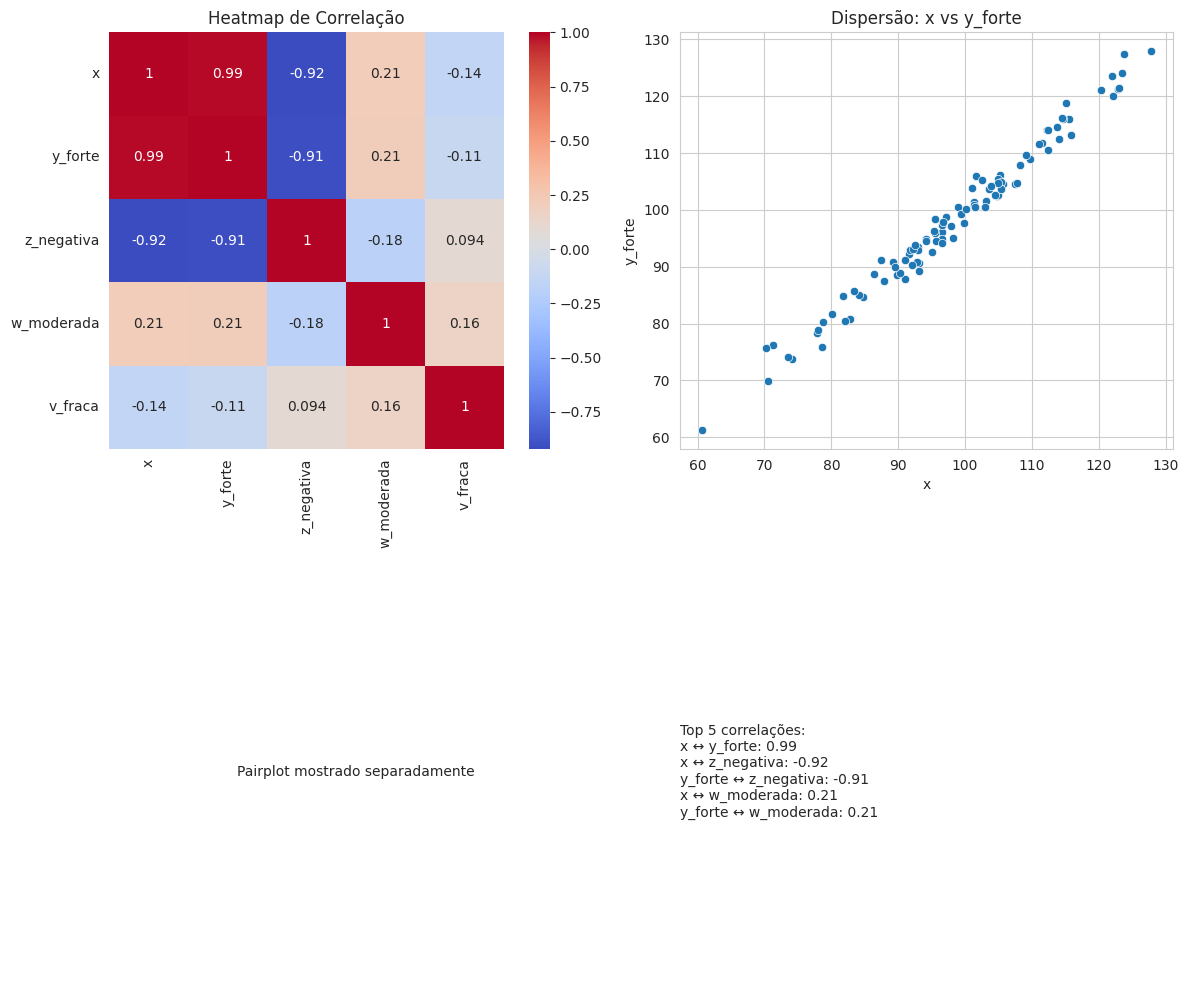


✓ Dashboard criado com sucesso!

💡 O dashboard integra:
   1. Heatmap: visão geral de todas correlações
   2. Scatter: foco no par mais correlacionado
   3. Pairplot info: análise multivariada
   4. Top 5: ranking das correlações


q3 results: All test cases passed!

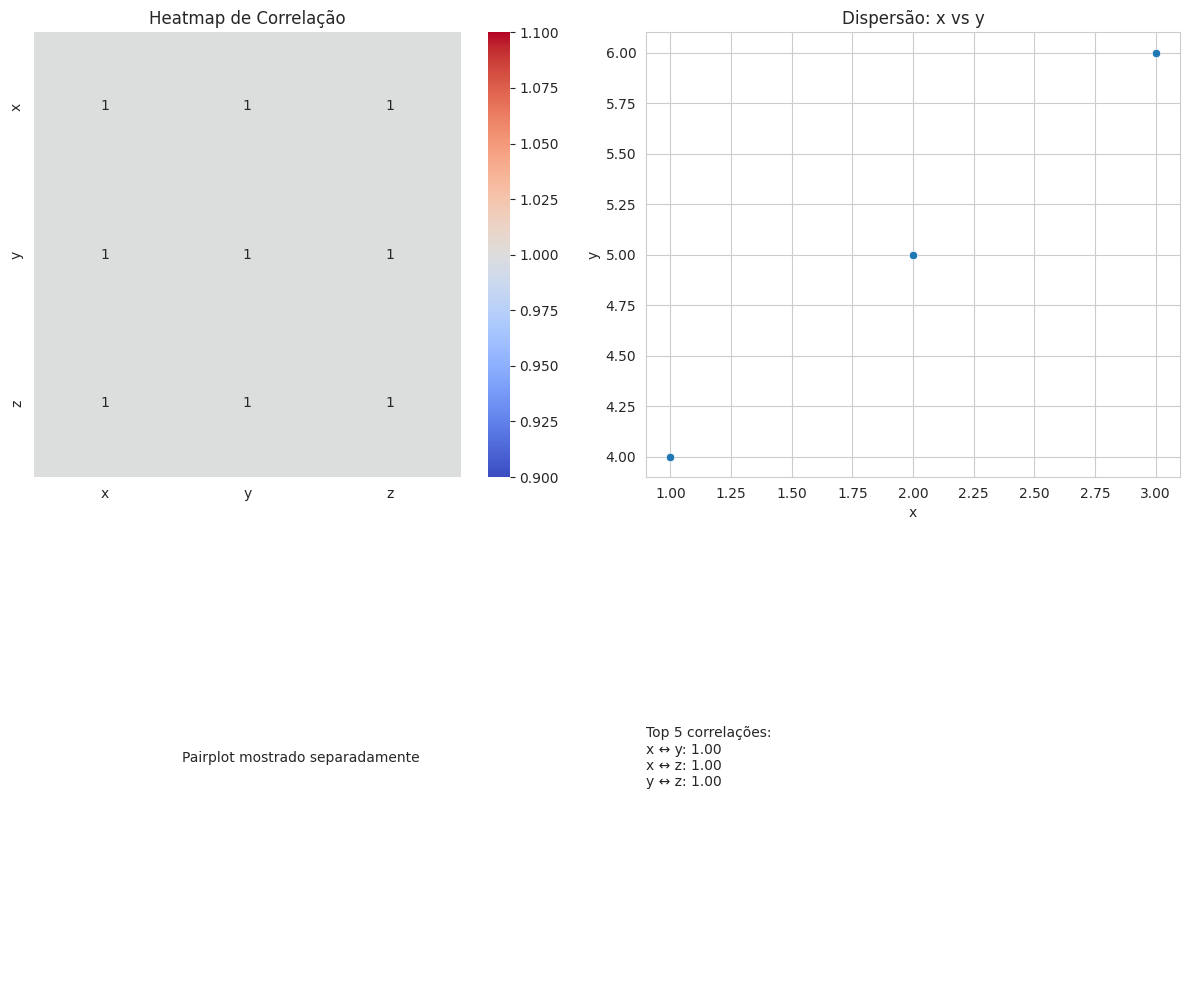

In [12]:
# Usar dados anteriores
print("=== TESTE Q3 ===")
print("\n=== CRIANDO DASHBOARD ===")

fig, axes = criar_dashboard_correlacoes(df_correlacoes)
plt.show()

print("\n✓ Dashboard criado com sucesso!")
print("\n💡 O dashboard integra:")
print("   1. Heatmap: visão geral de todas correlações")
print("   2. Scatter: foco no par mais correlacionado")
print("   3. Pairplot info: análise multivariada")
print("   4. Top 5: ranking das correlações")

grader.check("q3")

# Exercício 4: Relatório EDA Completo

## Descrição
Dado DataFrame, gere relatório EDA completo com:

1. **info_basica**: dict com shape, tipos, missing
2. **estatisticas**: DataFrame com describe()
3. **correlacoes_fortes**: lista de correlações |r| >= 0.7
4. **outliers_por_coluna**: dict com contagem de outliers
5. **recomendacoes**: lista de strings com recomendações

Recomendações devem incluir:
- "Tratar missing values" se houver NaN
- "Investigar outliers em [colunas]" se houver
- "Considerar multicolinearidade" se há corr >= 0.9

## Retorno Esperado
Dicionário com as 5 chaves.

**Tempo estimado:** 5 minutos

In [13]:
def relatorio_eda_completo(df):
    """
    Gera relatório EDA completo.

    Args:
        df (pd.DataFrame): DataFrame

    Returns:
        dict: Relatório completo
    """
    # === SEU CÓDIGO AQUI ===

    info_basica = {
        "shape": df.shape,
        "tipos": df.dtypes.to_dict(),
        "total_missing": int(df.isna().sum().sum())
    }

    estatisticas = df.describe()

    corr = df.corr(numeric_only=True)
    pares = []
    for i in range(len(corr.columns)):
        for j in range(i + 1, len(corr.columns)):
            pares.append((corr.columns[i], corr.columns[j], corr.iloc[i, j]))
    correlacoes_fortes = [(a, b, c) for a, b, c in pares if abs(c) >= 0.7]

    outliers_por_coluna = {}
    for col in df.select_dtypes(include=np.number):
        q1, q3 = df[col].quantile([0.25, 0.75])
        iqr = q3 - q1
        limites = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)
        outliers_por_coluna[col] = int(((df[col] < limites[0]) | (df[col] > limites[1])).sum())

    recomendacoes = []
    if info_basica["total_missing"] > 0:
        recomendacoes.append("Tratar missing values")
    if any(v > 0 for v in outliers_por_coluna.values()):
        cols_outliers = [col for col, v in outliers_por_coluna.items() if v > 0]
        recomendacoes.append(f"Investigar outliers em {cols_outliers}")
    if any(abs(c) >= 0.9 for _, _, c in correlacoes_fortes):
        recomendacoes.append("Considerar multicolinearidade entre variáveis")

    return {
        "info_basica": info_basica,
        "estatisticas": estatisticas,
        "correlacoes_fortes": correlacoes_fortes,
        "outliers_por_coluna": outliers_por_coluna,
        "recomendacoes": recomendacoes
    }

    # === FIM DO SEU CÓDIGO ===

In [14]:
# Gerar relatório
print("=== TESTE Q4 ===")
print("\n=== GERANDO RELATÓRIO EDA ===")

relatorio = relatorio_eda_completo(df_correlacoes)

print("\n=== 1. INFORMAÇÕES BÁSICAS ===")
print(f"Shape: {relatorio['info_basica']['shape']}")
print(f"Total de valores faltantes: {relatorio['info_basica']['total_missing']}")

print("\n=== 2. ESTATÍSTICAS DESCRITIVAS ===")
print(relatorio['estatisticas'])

print(f"\n=== 3. CORRELAÇÕES FORTES (>= 0.7) ===")
if relatorio['correlacoes_fortes']:
    for v1, v2, corr in relatorio['correlacoes_fortes']:
        print(f"  {v1} ↔ {v2}: {corr:+.3f}")
else:
    print("  Nenhuma encontrada")

print("\n=== 4. OUTLIERS POR COLUNA ===")
for col, count in relatorio['outliers_por_coluna'].items():
    print(f"  {col}: {count} outliers")

print("\n=== 5. RECOMENDAÇÕES ===")
for i, rec in enumerate(relatorio['recomendacoes'], 1):
    print(f"  {i}. {rec}")

print("\n✓ Relatório completo gerado!")

grader.check("q4")

=== TESTE Q4 ===

=== GERANDO RELATÓRIO EDA ===

=== 1. INFORMAÇÕES BÁSICAS ===
Shape: (100, 5)
Total de valores faltantes: 0

=== 2. ESTATÍSTICAS DESCRITIVAS ===
                x     y_forte  z_negativa  w_moderada     v_fraca
count  100.000000  100.000000  100.000000  100.000000  100.000000
mean    98.442302   98.486911  -98.117821  101.357954   98.879911
std     13.622526   13.495255   13.666624   17.833794   21.274606
min     60.703823   61.257205 -130.249859   67.583522   53.961577
25%     90.986415   90.552390 -105.910773   87.866743   82.166327
50%     98.095656   98.189107  -97.898095  100.307934   98.482009
75%    106.089281  105.532871  -90.063087  113.907918  113.029002
max    127.784173  127.921299  -65.611367  144.484264  161.577616

=== 3. CORRELAÇÕES FORTES (>= 0.7) ===
  x ↔ y_forte: +0.990
  x ↔ z_negativa: -0.921
  y_forte ↔ z_negativa: -0.913

=== 4. OUTLIERS POR COLUNA ===
  x: 1 outliers
  y_forte: 1 outliers
  z_negativa: 2 outliers
  w_moderada: 0 outliers
  v_f

q4 results: All test cases passed!

# Resumo

Nesta prática você trabalhou com:
- Análise completa de correlações (fortes, moderadas, fracas)
- Visualização de relações categóricas vs numéricas
- Criação de dashboards integrados
- Geração de relatórios EDA automatizados

**Pontuação total:** 10 pontos

## Próximos Passos

Você completou as aulas 5-8! Agora você está pronto para:
1. Trabalhar no **notebook quinzenal** que integra todo o conteúdo
2. Aplicar EDA em datasets reais
3. Criar análises exploratórias profissionais
4. Preparar dados para machine learning

**Parabéns pelo progresso!**